In [1]:
import os 
import pickle
import vitaldb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Early Exploration

In [3]:
# import data
dataFile = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files\0001.vital'

# read track list
vitaldb.vital_trks(dataFile)

['EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar8000/HR',
 'Solar8000/ST_I',
 'Solar8000/ST_II',
 'Solar8000/ST_III',
 'Solar8000/ST_AVL',
 'Solar8000/ST_AVR',
 'Solar8000/ST_AVF',
 'Solar8000/ART_MBP',
 'Solar8000/ART_SBP',
 'Solar8000/ART_DBP',
 'Solar8000/PLETH_SPO2',
 'Solar8000/PLETH_HR',
 'Solar8000/BT',
 'Solar8000/VENT_MAWP',
 'Solar8000/ST_V5',
 'Solar8000/NIBP_MBP',
 'Solar8000/NIBP_SBP',
 'Solar8000/NIBP_DBP',
 'Solar8000/VENT_PIP',
 'Solar8000/VENT_RR',
 'Solar8000/VENT_MV',
 'Solar8000/VENT_TV',
 'Solar8000/VENT_PPLAT',
 'Solar8000/GAS2_AGENT',
 'Solar8000/GAS2_EXPIRED',
 'Solar8000/GAS2_INSPIRED',
 'Solar8000/ETCO2',
 'Solar8000/INCO2',
 'Solar8000/RR_CO2',
 'Solar8000/FEO2',
 'Solar8000/FIO2',
 'Solar8000/VENT_INSP_TM',
 'Solar8000/VENT_SET_TV',
 'Solar8000/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Primus/MAWP_MBAR',
 'Primus/MAC',
 'Primus/VENT_LEAK',
 'Primus/INCO2',

In [7]:
# import data
dataFile = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files\0001.vital'

# read track list
vitaldb.vital_trks(dataFile)

track_names = ['EVENT', 'BIS/BIS', 'Solar8000/HR', 'SNUADC/ART']
df = vitaldb.vital_recs(dataFile, track_names=track_names, return_datetime=True, return_pandas=True)

print(df.shape)
df.head()

(5771049, 5)


,Time,EVENT,BIS/BIS,Solar8000/HR,SNUADC/ART
0,2100-01-01 00:00:00+00:00,Case started,NaN,NaN,NaN
1,2100-01-01 00:00:00.002000+00:00,NaN,NaN,NaN,NaN
2,2100-01-01 00:00:00.004000+00:00,NaN,NaN,NaN,NaN
3,2100-01-01 00:00:00.006000+00:00,NaN,NaN,NaN,NaN
4,2100-01-01 00:00:00.008000+00:00,NaN,NaN,NaN,NaN


In [33]:
df['Solar8000/HR'].isnull().sum()

5765594

In [34]:
5771049 - 5765594

5455

In [24]:
df['Solar8000/HR'].dropna()

1382        88.0
2381        87.0
3382        88.0
4381        88.0
5381        88.0
           ...  
5466887    103.0
5467886    103.0
5468886    103.0
5469886    103.0
5470886    103.0
Name: Solar8000/HR, Length: 5455, dtype: object

<IPython.core.display.Javascript object>


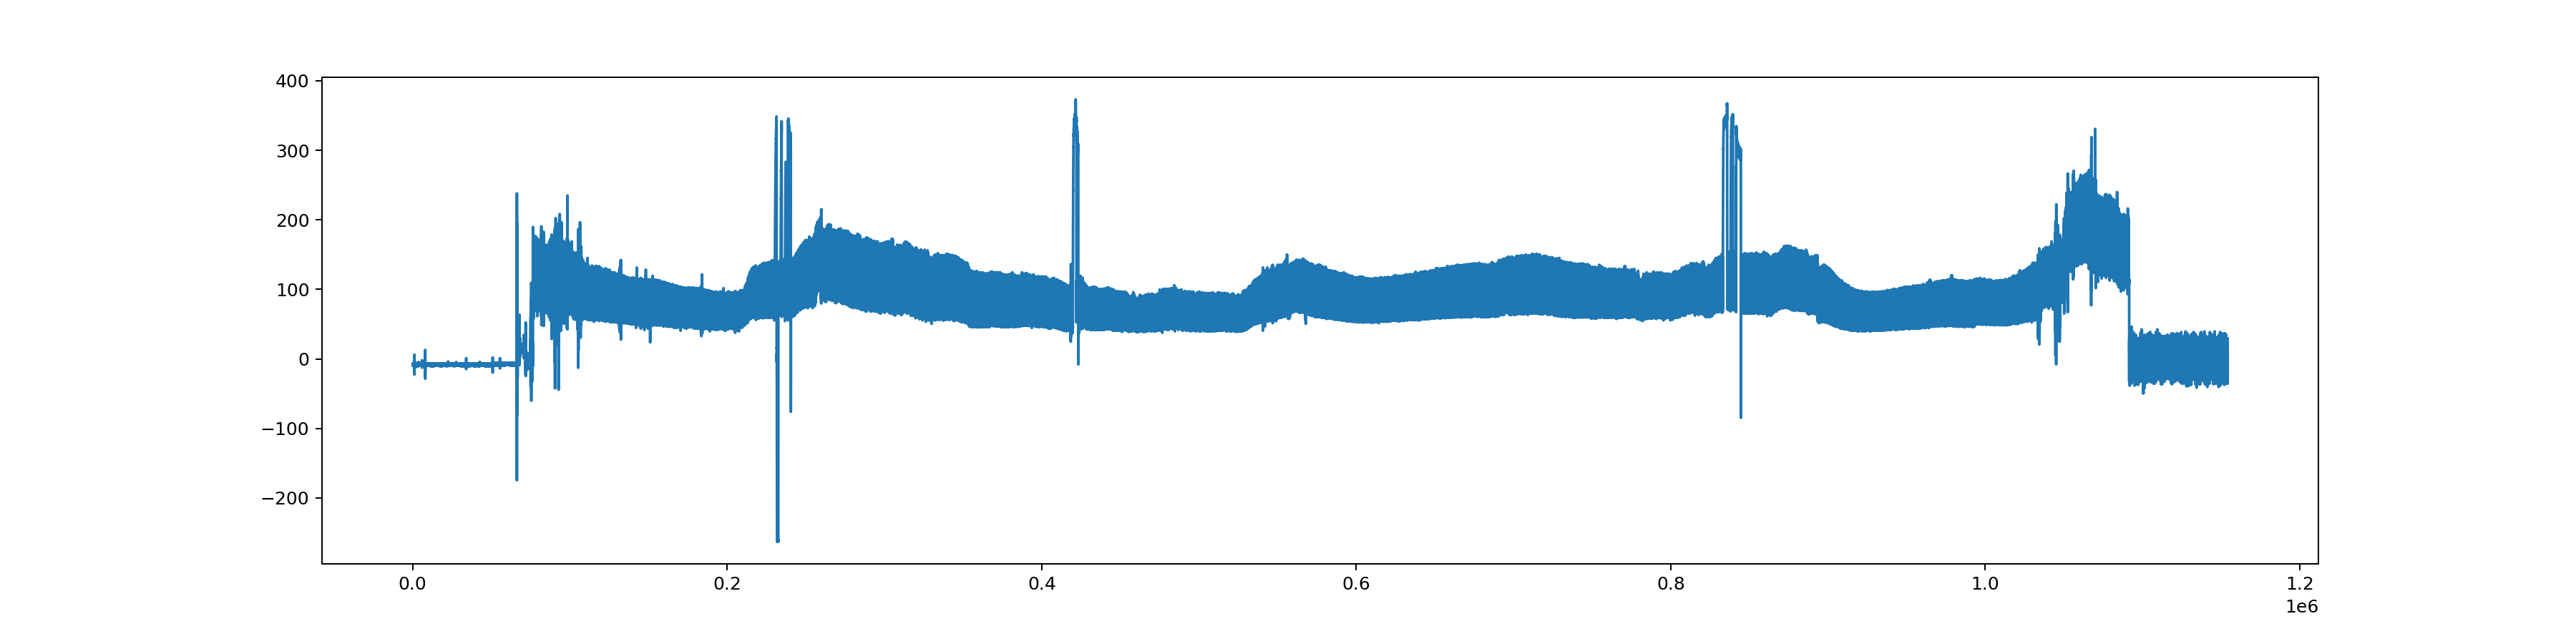

In [35]:
%matplotlib notebook

track_names = ['SNUADC/ART']
vf = vitaldb.VitalFile(1, track_names)
samples = vf.to_numpy(track_names, 1/100)

plt.figure(figsize=(20, 5))
plt.plot(samples[:, 0])
plt.show()

In [38]:
vf.get_track_names()

['SNUADC/ART']

### Determine Which Tracks are in All Vital Files

In [26]:
dataFolder = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files'
fileList = os.listdir(dataFolder)

sbp_list = []
dbp_list = []
mbp_list = []
hr_list = []
temp_list = []
rr_list = []
bis_list = []

for file in fileList:
    
    print(file)
    
    # get current file
    curFile = os.path.join(dataFolder, file)
    
    # read track list
    curTracks = vitaldb.vital_trks(curFile)
    
    # check if tracks exist
    if 'Solar8000/ART_SBP' in curTracks:
        sbp_list.append(file)
        
    if 'Solar8000/ART_DBP' in curTracks:
        dbp_list.append(file)
        
    if 'Solar8000/ART_MBP' in curTracks:
        mbp_list.append(file)
        
    if 'Solar8000/HR' in curTracks:
        hr_list.append(file)
        
    if 'Solar8000/BT' in curTracks:
        temp_list.append(file)
        
    if 'Solar8000/RR' in curTracks:
        rr_list.append(file)
        
    if 'BIS/BIS' in curTracks:
        bis_list.append(file)
        
print('done!')

0001.vital
0002.vital
0003.vital
0004.vital
0005.vital
0006.vital
0007.vital
0008.vital
0009.vital
0010.vital
0011.vital
0012.vital
0013.vital
0014.vital
0015.vital
0016.vital
0017.vital
0018.vital
0019.vital
0020.vital
0021.vital
0022.vital
0023.vital
0024.vital
0025.vital
0026.vital
0027.vital
0028.vital
0029.vital
0030.vital
0031.vital
0032.vital
0033.vital
0034.vital
0035.vital
0036.vital
0037.vital
0038.vital
0039.vital
0040.vital
0041.vital
0042.vital
0043.vital
0044.vital
0045.vital
0046.vital
0047.vital
0048.vital
0049.vital
0050.vital
0051.vital
0052.vital
0053.vital
0054.vital
0055.vital
0056.vital
0057.vital
0058.vital
0059.vital
0060.vital
0061.vital
0062.vital
0063.vital
0064.vital
0065.vital
0066.vital
0067.vital
0068.vital
0069.vital
0070.vital
0071.vital
0072.vital
0073.vital
0074.vital
0075.vital
0076.vital
0077.vital
0078.vital
0079.vital
0080.vital
0081.vital
0082.vital
0083.vital
0084.vital
0085.vital
0086.vital
0087.vital
0088.vital
0089.vital
0090.vital
0091.vital

0746.vital
0747.vital
0748.vital
0749.vital
0750.vital
0751.vital
0752.vital
0753.vital
0754.vital
0755.vital
0756.vital
0757.vital
0758.vital
0759.vital
0760.vital
0761.vital
0762.vital
0763.vital
0764.vital
0765.vital
0766.vital
0767.vital
0768.vital
0769.vital
0770.vital
0771.vital
0772.vital
0773.vital
0774.vital
0775.vital
0776.vital
0777.vital
0778.vital
0779.vital
0780.vital
0781.vital
0782.vital
0783.vital
0784.vital
0785.vital
0786.vital
0787.vital
0788.vital
0789.vital
0790.vital
0791.vital
0792.vital
0793.vital
0794.vital
0795.vital
0796.vital
0797.vital
0798.vital
0799.vital
0800.vital
0801.vital
0802.vital
0803.vital
0804.vital
0805.vital
0806.vital
0807.vital
0808.vital
0809.vital
0810.vital
0811.vital
0812.vital
0813.vital
0814.vital
0815.vital
0816.vital
0817.vital
0818.vital
0819.vital
0820.vital
0821.vital
0822.vital
0823.vital
0824.vital
0825.vital
0826.vital
0827.vital
0828.vital
0829.vital
0830.vital
0831.vital
0832.vital
0833.vital
0834.vital
0835.vital
0836.vital

1491.vital
1492.vital
1493.vital
1494.vital
1495.vital
1496.vital
1497.vital
1498.vital
1499.vital
1500.vital
1501.vital
1502.vital
1503.vital
1504.vital
1505.vital
1506.vital
1507.vital
1508.vital
1509.vital
1510.vital
1511.vital
1512.vital
1513.vital
1514.vital
1515.vital
1516.vital
1517.vital
1518.vital
1519.vital
1520.vital
1521.vital
1522.vital
1523.vital
1524.vital
1525.vital
1526.vital
1527.vital
1528.vital
1529.vital
1530.vital
1531.vital
1532.vital
1533.vital
1534.vital
1535.vital
1536.vital
1537.vital
1538.vital
1539.vital
1540.vital
1541.vital
1542.vital
1543.vital
1544.vital
1545.vital
1546.vital
1547.vital
1548.vital
1549.vital
1550.vital
1551.vital
1552.vital
1553.vital
1554.vital
1555.vital
1556.vital
1557.vital
1558.vital
1559.vital
1560.vital
1561.vital
1562.vital
1563.vital
1564.vital
1565.vital
1566.vital
1567.vital
1568.vital
1569.vital
1570.vital
1571.vital
1572.vital
1573.vital
1574.vital
1575.vital
1576.vital
1577.vital
1578.vital
1579.vital
1580.vital
1581.vital

2236.vital
2237.vital
2238.vital
2239.vital
2240.vital
2241.vital
2242.vital
2243.vital
2244.vital
2245.vital
2246.vital
2247.vital
2248.vital
2249.vital
2250.vital
2251.vital
2252.vital
2253.vital
2254.vital
2255.vital
2256.vital
2257.vital
2258.vital
2259.vital
2260.vital
2261.vital
2262.vital
2263.vital
2264.vital
2265.vital
2266.vital
2267.vital
2268.vital
2269.vital
2270.vital
2271.vital
2272.vital
2273.vital
2274.vital
2275.vital
2276.vital
2277.vital
2278.vital
2279.vital
2280.vital
2281.vital
2282.vital
2283.vital
2284.vital
2285.vital
2286.vital
2287.vital
2288.vital
2289.vital
2290.vital
2291.vital
2292.vital
2293.vital
2294.vital
2295.vital
2296.vital
2297.vital
2298.vital
2299.vital
2300.vital
2301.vital
2302.vital
2303.vital
2304.vital
2305.vital
2306.vital
2307.vital
2308.vital
2309.vital
2310.vital
2311.vital
2312.vital
2313.vital
2314.vital
2315.vital
2316.vital
2317.vital
2318.vital
2319.vital
2320.vital
2321.vital
2322.vital
2323.vital
2324.vital
2325.vital
2326.vital

2981.vital
2982.vital
2983.vital
2984.vital
2985.vital
2986.vital
2987.vital
2988.vital
2989.vital
2990.vital
2991.vital
2992.vital
2993.vital
2994.vital
2995.vital
2996.vital
2997.vital
2998.vital
2999.vital
3000.vital
3001.vital
3002.vital
3003.vital
3004.vital
3005.vital
3006.vital
3007.vital
3008.vital
3009.vital
3010.vital
3011.vital
3012.vital
3013.vital
3014.vital
3015.vital
3016.vital
3017.vital
3018.vital
3019.vital
3020.vital
3021.vital
3022.vital
3023.vital
3024.vital
3025.vital
3026.vital
3027.vital
3028.vital
3029.vital
3030.vital
3031.vital
3032.vital
3033.vital
3034.vital
3035.vital
3036.vital
3037.vital
3038.vital
3039.vital
3040.vital
3041.vital
3042.vital
3043.vital
3044.vital
3045.vital
3046.vital
3047.vital
3048.vital
3049.vital
3050.vital
3051.vital
3052.vital
3053.vital
3054.vital
3055.vital
3056.vital
3057.vital
3058.vital
3059.vital
3060.vital
3061.vital
3062.vital
3063.vital
3064.vital
3065.vital
3066.vital
3067.vital
3068.vital
3069.vital
3070.vital
3071.vital

3726.vital
3727.vital
3728.vital
3729.vital
3730.vital
3731.vital
3732.vital
3733.vital
3734.vital
3735.vital
3736.vital
3737.vital
3738.vital
3739.vital
3740.vital
3741.vital
3742.vital
3743.vital
3744.vital
3745.vital
3746.vital
3747.vital
3748.vital
3749.vital
3750.vital
3751.vital
3752.vital
3753.vital
3754.vital
3755.vital
3756.vital
3757.vital
3758.vital
3759.vital
3760.vital
3761.vital
3762.vital
3763.vital
3764.vital
3765.vital
3766.vital
3767.vital
3768.vital
3769.vital
3770.vital
3771.vital
3772.vital
3773.vital
3774.vital
3775.vital
3776.vital
3777.vital
3778.vital
3779.vital
3780.vital
3781.vital
3782.vital
3783.vital
3784.vital
3785.vital
3786.vital
3787.vital
3788.vital
3789.vital
3790.vital
3791.vital
3792.vital
3793.vital
3794.vital
3795.vital
3796.vital
3797.vital
3798.vital
3799.vital
3800.vital
3801.vital
3802.vital
3803.vital
3804.vital
3805.vital
3806.vital
3807.vital
3808.vital
3809.vital
3810.vital
3811.vital
3812.vital
3813.vital
3814.vital
3815.vital
3816.vital

4471.vital
4472.vital
4473.vital
4474.vital
4475.vital
4476.vital
4477.vital
4478.vital
4479.vital
4480.vital
4481.vital
4482.vital
4483.vital
4484.vital
4485.vital
4486.vital
4487.vital
4488.vital
4489.vital
4490.vital
4491.vital
4492.vital
4493.vital
4494.vital
4495.vital
4496.vital
4497.vital
4498.vital
4499.vital
4500.vital
4501.vital
4502.vital
4503.vital
4504.vital
4505.vital
4506.vital
4507.vital
4508.vital
4509.vital
4510.vital
4511.vital
4512.vital
4513.vital
4514.vital
4515.vital
4516.vital
4517.vital
4518.vital
4519.vital
4520.vital
4521.vital
4522.vital
4523.vital
4524.vital
4525.vital
4526.vital
4527.vital
4528.vital
4529.vital
4530.vital
4531.vital
4532.vital
4533.vital
4534.vital
4535.vital
4536.vital
4537.vital
4538.vital
4539.vital
4540.vital
4541.vital
4542.vital
4543.vital
4544.vital
4545.vital
4546.vital
4547.vital
4548.vital
4549.vital
4550.vital
4551.vital
4552.vital
4553.vital
4554.vital
4555.vital
4556.vital
4557.vital
4558.vital
4559.vital
4560.vital
4561.vital

5216.vital
5217.vital
5218.vital
5219.vital
5220.vital
5221.vital
5222.vital
5223.vital
5224.vital
5225.vital
5226.vital
5227.vital
5228.vital
5229.vital
5230.vital
5231.vital
5232.vital
5233.vital
5234.vital
5235.vital
5236.vital
5237.vital
5238.vital
5239.vital
5240.vital
5241.vital
5242.vital
5243.vital
5244.vital
5245.vital
5246.vital
5247.vital
5248.vital
5249.vital
5250.vital
5251.vital
5252.vital
5253.vital
5254.vital
5255.vital
5256.vital
5257.vital
5258.vital
5259.vital
5260.vital
5261.vital
5262.vital
5263.vital
5264.vital
5265.vital
5266.vital
5267.vital
5268.vital
5269.vital
5270.vital
5271.vital
5272.vital
5273.vital
5274.vital
5275.vital
5276.vital
5277.vital
5278.vital
5279.vital
5280.vital
5281.vital
5282.vital
5283.vital
5284.vital
5285.vital
5286.vital
5287.vital
5288.vital
5289.vital
5290.vital
5291.vital
5292.vital
5293.vital
5294.vital
5295.vital
5296.vital
5297.vital
5298.vital
5299.vital
5300.vital
5301.vital
5302.vital
5303.vital
5304.vital
5305.vital
5306.vital

5961.vital
5962.vital
5963.vital
5964.vital
5965.vital
5966.vital
5967.vital
5968.vital
5969.vital
5970.vital
5971.vital
5972.vital
5973.vital
5974.vital
5975.vital
5976.vital
5977.vital
5978.vital
5979.vital
5980.vital
5981.vital
5982.vital
5983.vital
5984.vital
5985.vital
5986.vital
5987.vital
5988.vital
5989.vital
5990.vital
5991.vital
5992.vital
5993.vital
5994.vital
5995.vital
5996.vital
5997.vital
5998.vital
5999.vital
6000.vital
6001.vital
6002.vital
6003.vital
6004.vital
6005.vital
6006.vital
6007.vital
6008.vital
6009.vital
6010.vital
6011.vital
6012.vital
6013.vital
6014.vital
6015.vital
6016.vital
6017.vital
6018.vital
6019.vital
6020.vital
6021.vital
6022.vital
6023.vital
6024.vital
6025.vital
6026.vital
6027.vital
6028.vital
6029.vital
6030.vital
6031.vital
6032.vital
6033.vital
6034.vital
6035.vital
6036.vital
6037.vital
6038.vital
6039.vital
6040.vital
6041.vital
6042.vital
6043.vital
6044.vital
6045.vital
6046.vital
6047.vital
6048.vital
6049.vital
6050.vital
6051.vital

In [27]:
print(len(sbp_list))
print(len(dbp_list))
print(len(mbp_list))
print(len(hr_list))
print(len(temp_list))
print(len(rr_list))
print(len(bis_list))

3528
3530
3527
6388
5917
1294
5566


In [3]:
# alternatively, there's a function that's much faster
caseids = vitaldb.find_cases(['BT'])
len(caseids)

5917

### Evaluate BIS

In [20]:
# import data
dataFile = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files\0001.vital'

track_names = ['EVENT', 'BIS/BIS', 'Solar8000/HR', 'Solar8000/BT']
df = vitaldb.vital_recs(dataFile, track_names=track_names, return_datetime=True, interval=2, return_pandas=True)

print(df.shape)
df.head()

(5772, 5)


,Time,EVENT,BIS/BIS,Solar8000/HR,Solar8000/BT
0,2100-01-01 00:00:00+00:00,Case started,0.0,NaN,NaN
1,2100-01-01 00:00:02+00:00,NaN,0.0,88.0,20.9
2,2100-01-01 00:00:04+00:00,NaN,0.0,87.0,21.0
3,2100-01-01 00:00:06+00:00,NaN,0.0,88.0,21.0
4,2100-01-01 00:00:08+00:00,NaN,0.0,88.0,21.0


In [21]:
# find 'Surgery started' and 'Surgery finished'
startIdx = np.where(df['EVENT'].values == 'Surgery started')[0]
endIdx = np.where(df['EVENT'].values == 'Surgery finished')[0]

if (len(startIdx) == 1) & (len(endIdx) == 1):

    # trim data to surgery start and end
    df = df.drop(index=np.arange(0,startIdx[0], 1).tolist())
    df = df.drop(index=np.arange(endIdx[0]+1,df.index[-1]+1, 1).tolist())
    
# df['Time'] = df['Time'].dt.strftime('%H:%M:%S')
df

,Time,EVENT,BIS/BIS,Solar8000/HR,Solar8000/BT
834,2100-01-01 00:27:48+00:00,Surgery started,28.0,72.0,35.400002
835,2100-01-01 00:27:50+00:00,NaN,27.5,72.0,35.400002
836,2100-01-01 00:27:52+00:00,NaN,27.1,72.0,35.400002
837,2100-01-01 00:27:54+00:00,NaN,27.9,72.0,35.400002
838,2100-01-01 00:27:56+00:00,NaN,28.9,72.0,35.400002
...,...,...,...,...,...
5180,2100-01-01 02:52:40+00:00,NaN,63.299999,81.0,36.299999
5181,2100-01-01 02:52:42+00:00,NaN,63.0,80.0,36.299999
5182,2100-01-01 02:52:44+00:00,NaN,62.099998,80.0,36.299999
5183,2100-01-01 02:52:46+00:00,NaN,62.799999,80.0,36.299999


AttributeError: 'Series' object has no attribute 'time'

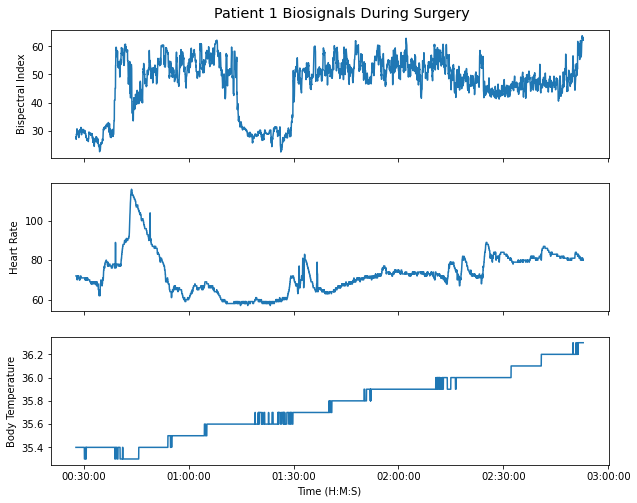

In [37]:
from matplotlib.dates import DateFormatter



fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10,8))
fig.suptitle('Patient 1 Biosignals During Surgery', y=0.92, x=0.53, fontsize='x-large')
ax1.plot(df['Time'], df['BIS/BIS'])
ax1.set_ylabel('Bispectral Index');
ax2.plot(df['Time'], df['Solar8000/HR'])
ax2.set_ylabel('Heart Rate');
ax3.plot(df['Time'], df['Solar8000/BT'])
ax3.set_ylabel('Body Temperature');

date_form = DateFormatter("%H:%M:%S")
ax3.xaxis.set_major_formatter(date_form)
ax3.set_xlabel('Time (H:M:S)');

In [18]:
df['Time'] = pd.to_datetime(df['Time']).dt.time
df['Time']

834     00:27:48
835     00:27:50
836     00:27:52
837     00:27:54
838     00:27:56
          ...   
5180    02:52:40
5181    02:52:42
5182    02:52:44
5183    02:52:46
5184    02:52:48
Name: Time, Length: 4351, dtype: object

In [19]:
type(df.Time[0])

KeyError: 0

In [17]:
df['Time'].dt.strftime('%H:%M:%S')

834     00:27:48
835     00:27:50
836     00:27:52
837     00:27:54
838     00:27:56
          ...   
4346    02:24:52
4347    02:24:54
4348    02:24:56
4349    02:24:58
4350    02:25:00
Name: Time, Length: 3517, dtype: object

In [14]:
# df.wheredf['EVENT'].str.find('Surgery started')
# df.index[df['EVENT'].str.contains('Surgery started')]
startIdx = np.where(df['EVENT'].values == 'Surgery started')[0]
endIdx = np.where(df['EVENT'].values == 'Surgery finished')[0]

print(df['EVENT'].iloc[startIdx])
print(df['EVENT'].iloc[endIdx])

834000    Surgery started
Name: EVENT, dtype: object
5184000    Surgery finished
Name: EVENT, dtype: object


In [20]:
bis = df['BIS/BIS']
hr = df['Solar8000/HR']
bis = bis.dropna()
hr = hr.dropna()

<AxesSubplot:>

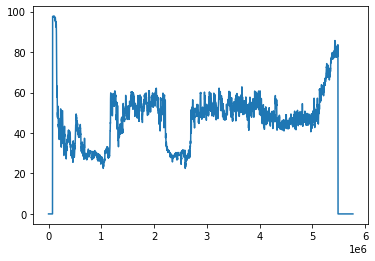

In [24]:
bis.plot()

<AxesSubplot:>

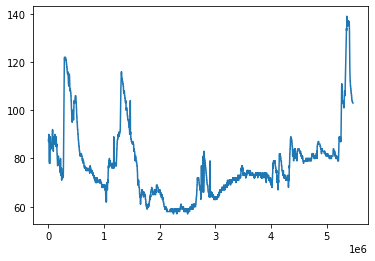

In [29]:
hr.plot()

use surgery type, demographics and BIS to predict how long it'll take a patient to come out of anesthesia

use preoperative HR to determine anesthesia duration

diagnosis - continue with feature engineering, output multiple predictions with confidence scores

mortality and icu duration - integrate time series
* determine usable timeseries data (operation start - operation end)
* downsample
* clean it
* HR, body temp, bis

lstm, tcn, transformers

### Clean Data

In [115]:
maxLen = 28651 # index = 5533
badIdx = []

# specify file
filePath = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files'

# params
track_names = ['EVENT', 'BIS/BIS', 'Solar8000/BT', 'Solar8000/HR']
interval = 2

# iterate over all vital files
for idx, fileName in enumerate(os.listdir(filePath)):
    
    print(idx)
    
    # get current file
    curFile = os.path.join(filePath, fileName)

    # get datetime, event, hr, body temp and bis data for single subjefct (interval = 1 second)
    df = vitaldb.vital_recs(curFile, track_names=track_names, return_datetime=True, interval=interval, return_pandas=True)

    # find 'Surgery started' and 'Surgery finished'
    startIdx = np.where(df['EVENT'].values == 'Surgery started')[0]
    endIdx = np.where(df['EVENT'].values == 'Surgery finished')[0]

    if (len(startIdx) == 1) & (len(endIdx) == 1):
        
        # trim data to surgery start and end
        df = df.drop(index=np.arange(0,startIdx[0], 1).tolist())
        df = df.drop(index=np.arange(endIdx[0]+1,df.index[-1]+1, 1).tolist())

        # drop 'Time' and 'EVENT' columns
        df = df.drop(columns=['Time', 'EVENT'])

        # check body temp, hr and bis bounds
        df.loc[(df["BIS/BIS"] < 0) | (df["BIS/BIS"] > 100), "BIS/BIS"] = -999
        df.loc[(df["Solar8000/BT"] < 30) | (df["Solar8000/BT"] > 43), "Solar8000/BT"] = -999
        df.loc[(df["Solar8000/HR"] < 20) | (df["Solar8000/HR"] > 220), "Solar8000/HR"] = -999

        # fill missing values with zeros
        df = df.fillna(value=-999)

        # pad length with zeros
        padLen = maxLen - len(df)
        
        # skip if pad length is less than or equal to zero
        if padLen > 0:
            padDf = pd.DataFrame(0, index=np.arange(padLen), columns=['BIS/BIS', 'Solar8000/BT', 'Solar8000/HR'])
            df = pd.concat([df, padDf]).reset_index(drop=True)

        elif padLen < 0:
            df = df.iloc[0:maxLen]
            
            
        # add dimension
        arr = df.to_numpy()
        arr = np.expand_dims(arr, axis=0)

        # append to df for all subjects
        if idx == 0:
            allData = arr
        else:
            allData = np.concatenate((allData, arr), axis=0)

    else:
        badIdx.append(idx)

    
with open('biosignals.pkl','wb') as f:
    pickle.dump(allData, f)
    
with open('droppedIndices.pkl','wb') as f:
    pickle.dump(badIdx, f)
    
# with open('biosignals.pkl','rb') as f:
#     x = pickle.load(f)
#     print(x.shape)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


In [69]:
with open('biosignals.pkl','wb') as f:
    pickle.dump(allData, f)
    
with open('droppedIndices.pkl','wb') as f:
    pickle.dump(badIdx, f)

(3, 28651)

In [124]:
badIdx = [1242, 4452]

with open('droppedIndices.pkl','wb') as f:
    pickle.dump(badIdx, f)

<IPython.core.display.Javascript object>


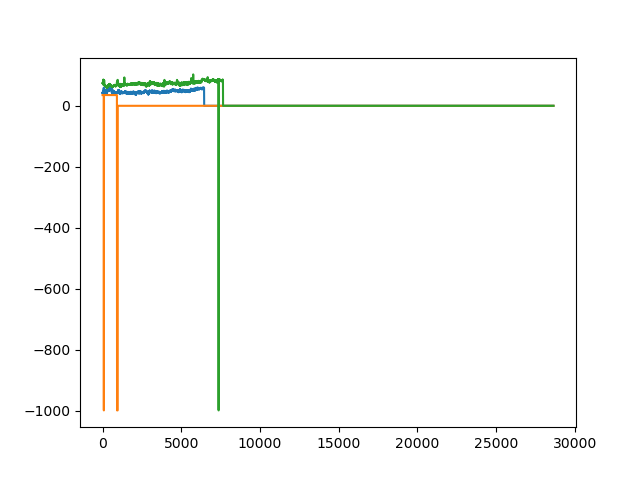

In [119]:
plt.plot(allData[1,:,0])
plt.plot(allData[2,:,1])
plt.plot(allData[3,:,2])

In [125]:
data = allData
subj1_bis = data[0,:,0]   # subject 1, bispectral index
subj1_bt = data[0,:,1]    # subject 1, body temperature
subj1_hr = data[0,:,2]    # subject 1, heart rate

subj2_bis = data[1,:,0]   # subject 2, bispectral index
subj2_bt = data[1,:,1]    # subject 2, body temperature
subj2_hr = data[1,:,2]    # subject 2, heart rate

In [50]:
# save
with open('biosignals.pkl','wb') as f:
    pickle.dump(allData, f)
    
with open('droppedIndices.pkl','wb') as f:
    pickle.dump(badIdx, f)

In [121]:
# load data
with open('biosignals.pkl','rb') as f:
    data = pickle.load(f)
    print('data shape: ', data.shape); print()
    
with open('droppedIndices.pkl','rb') as f:
    dropIdx = pickle.load(f)
    print('dropped subjects: ', dropIdx)

data shape:  (6386, 28651, 3)

dropped subjects:  [1241, 4451]


<AxesSubplot:>

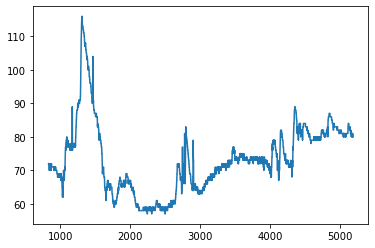

In [57]:
df['Solar8000/HR'].plot()

### Find Length of Longest Surgery

In [35]:
surgeryLength = []
badIdx = []

# specify file
filePath = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files'
 
# iterate over all vital files
for idx, fileName in enumerate(os.listdir(filePath)[1240:]):
    
    idx = idx+1240
    print(idx)
    
    # get current file
    curFile = os.path.join(filePath, fileName)
    
    track_names = ['EVENT']
    interval = 2
    df = vitaldb.vital_recs(curFile, track_names=track_names, return_datetime=True, interval=interval, return_pandas=True)

    # find 'Surgery started' and 'Surgery finished'
    startIdx = np.where(df['EVENT'].values == 'Surgery started')[0]
    endIdx = np.where(df['EVENT'].values == 'Surgery finished')[0]
    
    if (len(startIdx) == 1) & (len(endIdx) == 1):

        # trim data to surgery start and end
        df = df.drop(index=np.arange(0,startIdx[0], 1).tolist())
        df = df.drop(index=np.arange(endIdx[0]+1,df.index[-1]+1, 1).tolist())
        
        surgeryLength.append(len(df))
        
    else: 
        
        badIdx.append(idx)
    
    
    
    if (idx % 100 == 0):
        
        print('max value: ', max(surgeryLength))
        print('index: ', surgeryLength.index(max(surgeryLength)))
    
    

1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
max value:  9389
index:  50
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
max value:  13351
index:  67
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
142

2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
max value:  28201
index:  561
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
max value:  28201
index:  561
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977


KeyboardInterrupt: 